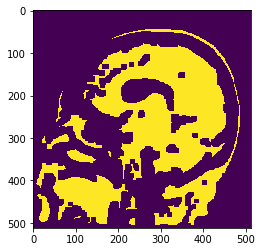

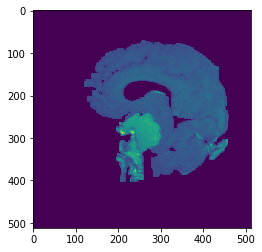

In [126]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
from skimage import measure

img = cv2.imdecode(np.fromfile('I:/Brain_Tumor/skull strip-good ones/646.jpg', dtype=np.uint8), cv2.IMREAD_GRAYSCALE)
img_out = img.copy()
plt.imshow(img_out)

# apply median filter
img_out = cv2.medianBlur(img_out,5)

#otsu thresholding
_, binarized = cv2.threshold (img_out, 125, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(binarized)

#erode
ret,th1 = cv2.threshold(img,50,255,cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)

erosion = cv2.erode(th1, kernel, iterations = 5)
plt.imshow(erosion)

# largest connected component
foreground_value = 255
mask = np.uint8(erosion == foreground_value)
labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]
largest_label = 1+np.argmax(stats[1:, cv2.CC_STAT_AREA]) 
mask1 = np.zeros_like(erosion)
mask1[labels == largest_label] = foreground_value
fig, ax = plt.subplots(nrows=1, ncols=1,  figsize = (4, 4))
plt.imshow(mask1)

#dilate
mask = cv2.dilate(mask1,kernel,iterations = 6)
plt.imshow(mask)

#masking
brain_img = np.zeros_like(img)
brain_img[mask == 255] = img[mask == 255]
plt.imshow(brain_img)

In [123]:
# Load image, grayscale, Otsu's threshold, and extract ROI
image = brain_img
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
x,y,w,h = cv2.boundingRect(thresh)
ROI = image[y:y+h, x:x+w]
plt.imshow(ROI)

error: OpenCV(4.1.0) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<1,-1,-1>,struct cv::impl::A0xe227985e::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


I:/Brain_Tumor/jpg/405\358.jpg
I:/Brain_Tumor/jpg/405\388.jpg
I:/Brain_Tumor/jpg/405\397.jpg
I:/Brain_Tumor/jpg/405\402.jpg
I:/Brain_Tumor/jpg/405\405.jpg
I:/Brain_Tumor/jpg/405\406.jpg
I:/Brain_Tumor/jpg/405\409.jpg
I:/Brain_Tumor/jpg/405\410.jpg
I:/Brain_Tumor/jpg/405\439.jpg
I:/Brain_Tumor/jpg/405\455.jpg


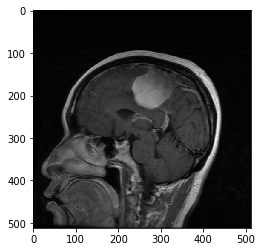

In [112]:
import os
# script_dir = os.path.dirname("I:/Brain_Tumor")
# rel_path = "../train/"

abs_file_path = os.path.join(script_dir, rel_path)
for img in glob.glob('I:/Brain_Tumor/jpg/405/*.jpg'):
    print(img)
    image=cv2.imread(img)
    plt.imshow(image)
 